In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster


In [2]:
derecho_cadd = pd.read_csv('../data/Computer_Aided_Dispatch_Data_Derecho_Incidents_050320_050420.csv', skiprows=3)
derecho_calls = pd.read_csv('../data/911_Phone_Calls_Derecho_050320_050420.csv')
tornado_cadd = pd.read_csv('../data/Computer_Aided_Dispatch_Data_Tornado_Incidents_030320.csv', skiprows=3)
tornado_calls = pd.read_csv('../data/911_Phone_Calls_Tornado_030320.csv')
path = gpd.read_file('../data/path_polygons.geojson')
damage_points = gpd.read_file('../data/damage_points.geojson')
tornado_paths = gpd.read_file('../data/tornado_paths.geojson')

In [3]:
damage_points = damage_points[['objectid', 'damage', 'damage_txt', 'efscale', 'windspeed', 'injuries',
                             'lat', 'lon', 'comments', 'geometry']]

In [4]:
derecho_calls['geometry'] = derecho_calls.apply(lambda x : Point((float(x['ALI Longitude']),
                                                                  float(x['ALI Latitude']))),
                                               axis=1)

In [5]:
derecho_calls_geo = gpd.GeoDataFrame(derecho_calls,
                                     crs = path.crs,
                                     geometry = derecho_calls['geometry'])

In [6]:
derecho_calls_geo = derecho_calls_geo.dropna()

In [7]:
derecho_cadd['geometry'] = derecho_cadd.apply(lambda x : Point((float(x['Longitude1']),
                                                                 float(x['Latitude1']))),
                                              axis=1)

In [8]:
derecho_cadd.dropna()

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1,geometry
0,5/3/2020 4:31:07 PM,901 KENWICK CT W,36.046877,-86.962526,ELECTRICAL HAZARD,POINT (-86.96252641 36.04687715)
1,5/3/2020 4:32:18 PM,8036 ARBOR DR,36.082491,-86.940680,ELECTRICAL HAZARD,POINT (-86.94067952 36.08249081)
2,5/3/2020 4:32:23 PM,119 DUE WEST AV E,36.248029,-86.716875,NOT ALERT COPD,POINT (-86.71687484 36.24802948)
3,5/3/2020 4:33:04 PM,630 GALLATIN PKE S,36.256491,-86.714817,ABDOMINAL PAIN,POINT (-86.71481656 36.25649117)
4,5/3/2020 4:33:52 PM,615 W HILLWOOD DR,36.129690,-86.879834,ELECTRICAL HAZARD,POINT (-86.87983392 36.12968971)
...,...,...,...,...,...,...
622,5/4/2020 12:21:00 AM,625 BENTON AV,36.131384,-86.770628,HIGH RISE NATURAL GAS ODOR,POINT (-86.77062846 36.13138384)
623,5/4/2020 12:21:32 AM,518 BRENTLAWN DR,36.064362,-86.761199,UNKNOWN STATUS,POINT (-86.76119919 36.06436167)
624,5/4/2020 12:22:47 AM,517 ALBANY DR,36.212754,-86.600431,ELECTRICAL HAZARD,POINT (-86.60043136 36.21275421)
625,5/4/2020 12:27:52 AM,639 LAFAYETTE ST,36.153769,-86.777520,SICK PERSON: NO PRIORITY SYMPTOMS,POINT (-86.77752015999999 36.15376939)


In [9]:
derecho_cadd_geo = gpd.GeoDataFrame(derecho_cadd,
                                    crs = path.crs,
                                    geometry = derecho_cadd['geometry'])

In [10]:
tornado_calls['geometry'] = tornado_calls.apply(lambda x : Point((float(x['ALI Longitude']),
                                                                float(x['ALI Latitude']))),
                                              axis=1)
tornado_calls

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,geometry
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector,POINT (-86.665779 36.072708)
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE,POINT (-86.841904 36.159634)
2,3/3/2020 0:36,911 Calls,36.264153,-86.708862,329 THELMA ST - S Sector,POINT (-86.708862 36.264153)
3,3/3/2020 0:36,911 Calls,NaN,NaN,526 FOUNDRY DR,POINT (nan nan)
4,3/3/2020 0:36,911 Calls,36.233467,-86.721077,5007B RUSKIN AVE - N,POINT (-86.72107699999999 36.233467)
...,...,...,...,...,...,...
470,3/3/2020 4:54,911 Calls,36.142552,-86.635330,WIRELESS CALLER,POINT (-86.63533 36.142552)
471,3/3/2020 4:54,911 Calls,36.189415,-86.813557,WIRELESS CALLER,POINT (-86.813557 36.189415)
472,3/3/2020 4:55,911 Calls,36.223534,-86.757874,WIRELESS CALLER,POINT (-86.757874 36.223534)
473,3/3/2020 4:56,911 Calls,36.168398,-86.783774,600 DR MARTIN L KING JR BLVD - NE,POINT (-86.78377399999999 36.168398)


In [11]:
tornado_calls_geo = gpd.GeoDataFrame(tornado_calls,
                                     crs = path.crs,
                                     geometry = tornado_calls['geometry'])

tornado_calls_geo

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,geometry
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector,POINT (-86.66578 36.07271)
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE,POINT (-86.84190 36.15963)
2,3/3/2020 0:36,911 Calls,36.264153,-86.708862,329 THELMA ST - S Sector,POINT (-86.70886 36.26415)
3,3/3/2020 0:36,911 Calls,NaN,NaN,526 FOUNDRY DR,POINT (nan nan)
4,3/3/2020 0:36,911 Calls,36.233467,-86.721077,5007B RUSKIN AVE - N,POINT (-86.72108 36.23347)
...,...,...,...,...,...,...
470,3/3/2020 4:54,911 Calls,36.142552,-86.635330,WIRELESS CALLER,POINT (-86.63533 36.14255)
471,3/3/2020 4:54,911 Calls,36.189415,-86.813557,WIRELESS CALLER,POINT (-86.81356 36.18941)
472,3/3/2020 4:55,911 Calls,36.223534,-86.757874,WIRELESS CALLER,POINT (-86.75787 36.22353)
473,3/3/2020 4:56,911 Calls,36.168398,-86.783774,600 DR MARTIN L KING JR BLVD - NE,POINT (-86.78377 36.16840)


In [12]:
tornado_calls_geo = tornado_calls_geo.loc[tornado_calls_geo['ALI Longitude'].notnull()]
tornado_calls_geo

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,geometry
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector,POINT (-86.66578 36.07271)
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE,POINT (-86.84190 36.15963)
2,3/3/2020 0:36,911 Calls,36.264153,-86.708862,329 THELMA ST - S Sector,POINT (-86.70886 36.26415)
4,3/3/2020 0:36,911 Calls,36.233467,-86.721077,5007B RUSKIN AVE - N,POINT (-86.72108 36.23347)
5,3/3/2020 0:37,911 Calls,36.149032,-86.795747,WIRELESS CALLER,POINT (-86.79575 36.14903)
...,...,...,...,...,...,...
470,3/3/2020 4:54,911 Calls,36.142552,-86.635330,WIRELESS CALLER,POINT (-86.63533 36.14255)
471,3/3/2020 4:54,911 Calls,36.189415,-86.813557,WIRELESS CALLER,POINT (-86.81356 36.18941)
472,3/3/2020 4:55,911 Calls,36.223534,-86.757874,WIRELESS CALLER,POINT (-86.75787 36.22353)
473,3/3/2020 4:56,911 Calls,36.168398,-86.783774,600 DR MARTIN L KING JR BLVD - NE,POINT (-86.78377 36.16840)


In [13]:
tornado_cadd['geometry'] = tornado_cadd.apply(lambda x : Point((float(x.Longitude1),
                                                                float(x.Latitude1))),
                                              axis=1)
tornado_cadd

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1,geometry
0,3/3/2020 12:36:34 AM,6205 COCKRILL BEND CIR,36.182002,-86.894052,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.89405212 36.18200191)
1,3/3/2020 12:37:24 AM,7337 COCKRILL BEND BLVD,36.175666,-86.894978,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.89497756999999 36.175666)
2,3/3/2020 12:38:17 AM,110 TUNE AIRPORT DR,36.179299,-86.883727,STRUCTURE FIRE COMMERCIAL INDUSTRIAL,POINT (-86.8837274 36.17929946)
3,3/3/2020 12:39:40 AM,555 MARRIOTT DR,36.151108,-86.689921,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.6899214 36.1511077)
4,3/3/2020 12:39:42 AM,1414 COUNTY HOSPITAL RD,36.177926,-86.845934,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.84593411 36.17792604)
...,...,...,...,...,...,...
255,3/3/2020 4:53:43 AM,1616 23RD AV N,36.175739,-86.813173,WIRES DOWN WITH NO SMOKE OR ARCING POWER DISCO...,POINT (-86.8131726 36.17573935)
256,3/3/2020 4:56:56 AM,5610 OLD HICKORY BLVD,36.180487,-86.601466,LARGE BUILDING INVESTIGATION,POINT (-86.60146627 36.18048712)
257,3/3/2020 4:57:06 AM,2903 MORNINGSIDE DR,36.223554,-86.757949,CHEST PAIN - ABNORMAL BREATHING,POINT (-86.75794879999999 36.2235535)
258,3/3/2020 4:57:14 AM,1730 KELLOW ST,36.189445,-86.813466,ABNORMAL BREATHING OTHER LUNG PROBLEMS,POINT (-86.81346598 36.18944545)


In [14]:
tornado_cadd_geo = gpd.GeoDataFrame(tornado_cadd,
                                     crs = path.crs,
                                     geometry = tornado_cadd['geometry'])

tornado_cadd_geo

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1,geometry
0,3/3/2020 12:36:34 AM,6205 COCKRILL BEND CIR,36.182002,-86.894052,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.89405 36.18200)
1,3/3/2020 12:37:24 AM,7337 COCKRILL BEND BLVD,36.175666,-86.894978,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.89498 36.17567)
2,3/3/2020 12:38:17 AM,110 TUNE AIRPORT DR,36.179299,-86.883727,STRUCTURE FIRE COMMERCIAL INDUSTRIAL,POINT (-86.88373 36.17930)
3,3/3/2020 12:39:40 AM,555 MARRIOTT DR,36.151108,-86.689921,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.68992 36.15111)
4,3/3/2020 12:39:42 AM,1414 COUNTY HOSPITAL RD,36.177926,-86.845934,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.84593 36.17793)
...,...,...,...,...,...,...
255,3/3/2020 4:53:43 AM,1616 23RD AV N,36.175739,-86.813173,WIRES DOWN WITH NO SMOKE OR ARCING POWER DISCO...,POINT (-86.81317 36.17574)
256,3/3/2020 4:56:56 AM,5610 OLD HICKORY BLVD,36.180487,-86.601466,LARGE BUILDING INVESTIGATION,POINT (-86.60147 36.18049)
257,3/3/2020 4:57:06 AM,2903 MORNINGSIDE DR,36.223554,-86.757949,CHEST PAIN - ABNORMAL BREATHING,POINT (-86.75795 36.22355)
258,3/3/2020 4:57:14 AM,1730 KELLOW ST,36.189445,-86.813466,ABNORMAL BREATHING OTHER LUNG PROBLEMS,POINT (-86.81347 36.18945)


In [15]:
center = path.geometry.centroid[18]

C:\Users\Patrick\AppData\Local\Temp/ipykernel_20816/835227647.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = path.geometry.centroid[18]


In [16]:
area_center = [center.y, center.x]

In [17]:
tornado_map = folium.Map(location = area_center, zoom_start = 12)
tornado_map

In [18]:
tornado_map = folium.Map(location = area_center, zoom_start=12)

style1 = {'fillColor': 'green', 'color': 'lightblue'}
style2 = {'fillColor': 'red', 'color': 'red'}

folium.GeoJson(tornado_paths, style_function=lambda x:style2).add_to(tornado_map)
folium.GeoJson(path, style_function=lambda x:style1).add_to(tornado_map)



for row_index, row_values in tornado_cadd_geo.iterrows():
    loc = [row_values['Latitude1'], row_values['Longitude1']]
    pop = str(row_values['Location'])
    icon=folium.Icon(color="darkpurple",icon="wind", prefix='fa')
    marker = folium.Marker(
        location = loc,
        popup = pop, icon = icon)
    marker.add_to(tornado_map)
    
for row_index, row_values in tornado_calls_geo.iterrows():
    loc = [row_values['ALI Latitude'], row_values['ALI Longitude']]
    pop = str(row_values['Seizure DateTime'])
    icon=folium.Icon(color="green", icon="phone", prefix='fa')
    marker = folium.Marker(
        location = loc,
        popup = pop, icon = icon)
    marker.add_to(tornado_map)
    
tornado_map

### 3. Investigate what types of structures were impacted. (Residential? Commercial?)

In [19]:
damage_txt = damage_points[['damage_txt','geometry']]
damage_txt

,damage_txt,geometry
0,One- or Two-Family Residences (FR12),POINT (-86.51628 36.18344)
1,Trees: Hardwood (TH),POINT (-85.60552 36.17308)
2,One- or Two-Family Residences (FR12),POINT (-85.57574 36.17740)
3,Small Barns or Farm Outbuildings (SBO),POINT (-86.76228 36.17340)
4,Masonry Apartment or Motel Building (MAM),POINT (-86.75692 36.17568)
...,...,...
3962,Manufactured Home - Single Wide (MHSW),POINT (-86.22961 36.19636)
3963,One- or Two-Family Residences (FR12),POINT (-86.20841 36.19219)
3964,Small Barns or Farm Outbuildings (SBO),POINT (-86.02540 36.17764)
3965,Other (O),POINT (-86.94269 36.17417)


In [23]:
structures = damage_points['damage_txt'].value_counts(ascending=True)
structures

Free-Standing Towers (FST)                                                      1
Junior or Senior High School (JHSH)                                             3
Large, Isolated Retail Building [K-Mart, Wal-Mart] (LIRB)                       3
Mid-Rise Building [5-20 Stories] (MRB)                                          4
Automobile Service Building (ASB)                                               4
Masonry Apartment or Motel Building (MAM)                                       5
Service Station Canopy (SSC)                                                    5
Motel (M)                                                                       6
Other (O)                                                                       9
Strip Mall (SM)                                                                 9
Elementary School [Single Story; Interior or Exterior Hallways] (ES)           10
Manufactured Home - Double Wide (MHDW)                                         11
Electrical Trans

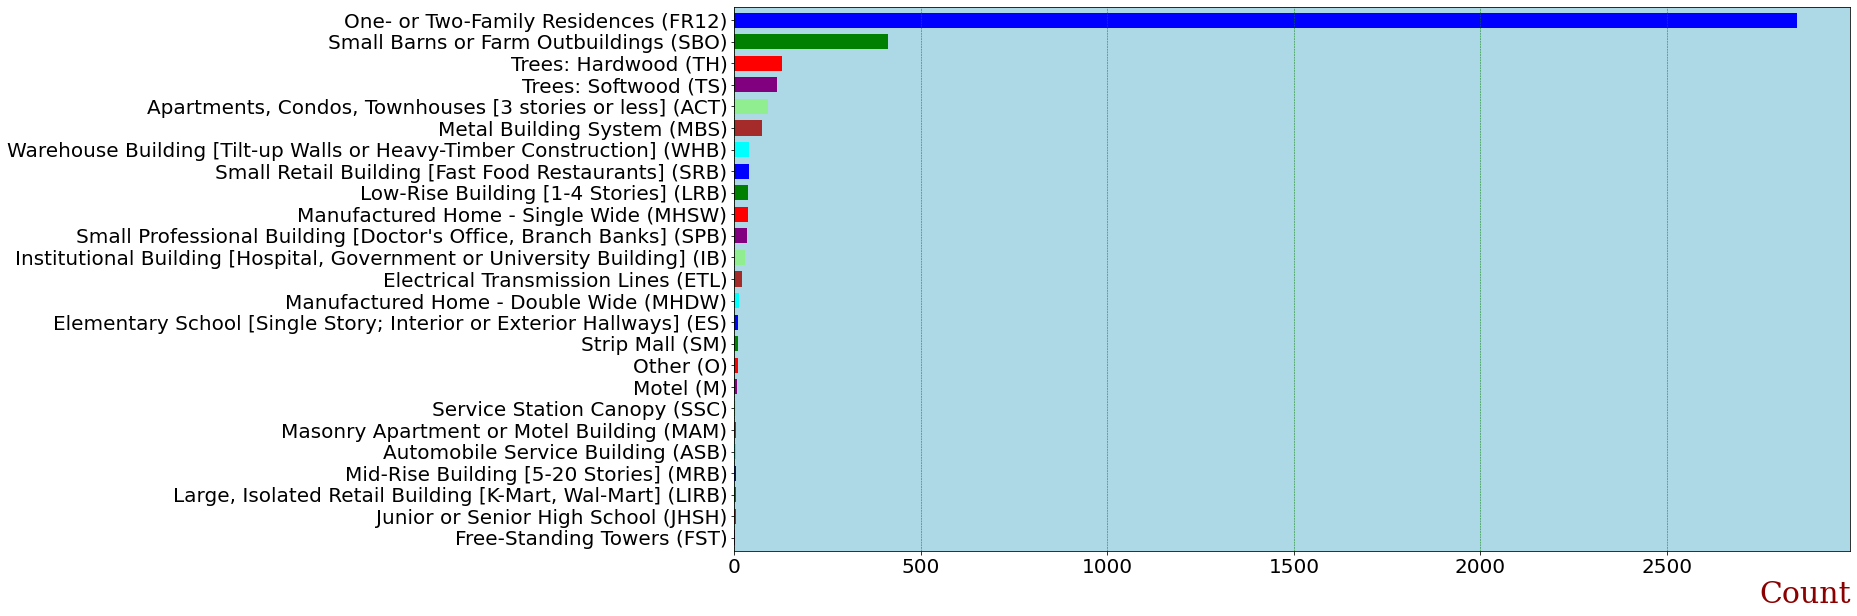

In [64]:
font2 = {'family':'serif','color':'darkred','size':30}
structures.plot.barh(damage_txt, width = 0.7, color=['purple', 'red', 'green', 'blue', 'cyan', 'brown', 'lightgreen'],
                     figsize=(20,10), )
plt.rcParams.update({'axes.facecolor':'lightblue'})
plt.xlabel("Count", fontdict = font2, loc = 'right')
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.grid(axis = 'x', color = 'green', linestyle = '--', linewidth=0.5);

In [36]:
damage_map = folium.Map(location = area_center, zoom_start=12)
folium.GeoJson(damage_points).add_to(damage_map)
damage_map

In [24]:
structures_map = folium.Map(location = area_center, zoom_start=12)

marker_cluster = folium.MarkerCluster().add_to(structures_map)
for row_index, row_values in damage_txt.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="red",icon="bus", prefix='fa')
folium.Marker(
    location=[40.67, -73.94],
    popup="Add popup text here.",
    icon=folium.Icon(color="green", icon="ok-sign"),
).add_to(marker_cluster)
structures_map

AttributeError: module 'folium' has no attribute 'MarkerCluster'

In [ ]:
park_fountains.loc[park_fountains['name'] == 'Riverfront Park']